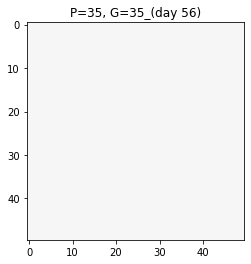

In [54]:
# Daily correlation grid
import matplotlib.pyplot as plt
import xarray as xr
import numpy
from pathlib import Path

nutrient =[2,5,10,15,35]
grazer = [0,1,3,6,10,20,25,30,35]
for j in grazer:
    for k in nutrient:
        data = Path(f"data/model_runs/scenario_kp10/scenario/p{k}-g{j}/biomass_data.nc")
        varpar= data.parent/'Daily_correlation_matrix'
        varpar.mkdir(exist_ok=True)
        biomass_grids = xr.open_dataarray(data)


        def autocorrelate(data):
             ndata = data - numpy.mean(data)
             acorr = numpy.correlate(ndata, ndata, 'full')[len(ndata)-1:]
             return acorr / numpy.var(data) / len(ndata)

        def corr_grid(biomass_g):
    
            X = biomass_g["X"]
            Y = biomass_g['Y']

            outarray = xr.zeros_like(biomass_g)
            for x in range(len(X)):
                for y in range(len(Y)):
                    tempp = biomass_g.data[:, y, x]
                    acorr = autocorrelate(tempp)
                    outarray[:, y, x] = acorr
            return outarray

        grid = corr_grid(biomass_grids)


        import matplotlib.pyplot as plt
        time= list(range(57))
        for i in time:
            outpath = varpar/f'day_{i:02d}.jpg'
            plt.imshow(grid[48*i], vmin=-1, vmax=1, cmap='RdBu')
            plt.title(f'P={k}, G={j}_(day {i})')
            #plt.colorbar()
            plt.savefig(outpath)

